In [15]:
from rasterstats import zonal_stats
import geopandas as gpd

import os
import numpy as np
import matplotlib.pyplot as plt

from configs.config_object import ConfigObject

In [2]:
config = ConfigObject('../configs/config.json')

## Load bathymetry asc files

In [3]:
# List of ASC files
path_swisstopo = config.paths.swiss_topo_path
path_grid = config.paths.grid_folder_path

## Load MITgcm grid

In [4]:
grid = gpd.read_file(os.path.join(path_grid, "grid_epsg2056.gpkg"))

In [5]:
# to get the grid shape
with open(os.path.join(path_grid, 'x_sg_grid.npy'), 'rb') as f:
    x = np.load(f)

## Compute average depth per cell

In [6]:
# Compute zonal statistics
stats = zonal_stats(grid, os.path.join(path_swisstopo, "merged_epsg2056.tif"), stats="mean", nodata=0)

In [7]:
grid["avg_altitude"] = [s["mean"] for s in stats]

In [8]:
grid["avg_altitude"].max()

372.0291748046875

In [9]:
grid["avg_depth"] = grid["avg_altitude"] - config.lake_altitude

In [10]:
grid["avg_depth"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: avg_depth, dtype: float64

In [11]:
grid["avg_depth"] = grid["avg_depth"].fillna(2)
depth_array = grid["avg_depth"].to_numpy().reshape(x.shape)

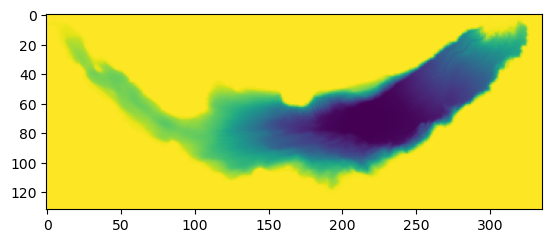

In [16]:
plt.imshow(depth_array)

## Save bathymetry

In [17]:
# Write gpkg file
grid.to_file(os.path.join(config.paths.grid_folder_path, "grid_with_depth_epsg2056.gpkg"), driver="GPKG")

In [18]:
# Write binary file
fid = open(os.path.join(config.paths.grid_folder_path, "bathy.bin"), 'wb')
depth_array.astype('>f8').tofile(fid)
fid.close()